In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [39]:
file_paths = [r"C:\Users\Manikanta\Data Science Innomatics\Internship Projects - Tasks\Task 3\Task 3 diminos_data_v2\diminos_data_v2\deliveries.csv",
             r"C:\Users\Manikanta\Data Science Innomatics\Internship Projects - Tasks\Task 3\Task 3 diminos_data_v2\diminos_data_v2\order_items.csv",
             r"C:\Users\Manikanta\Data Science Innomatics\Internship Projects - Tasks\Task 3\Task 3 diminos_data_v2\diminos_data_v2\orders.csv",
             r"C:\Users\Manikanta\Data Science Innomatics\Internship Projects - Tasks\Task 3\Task 3 diminos_data_v2\diminos_data_v2\products.csv"]

In [40]:
deliveries_df, order_items_df, orders_df, products_df = [pd.read_csv(file) for file in file_paths]

# Merge orders_df and order_items_df on 'order_id', then merge the result with deliveries_df on 'order_id'
df = pd.merge(pd.merge(orders_df, order_items_df, on='order_id'), deliveries_df, on='order_id')

In [41]:
df

,order_id,order_placed_at,items_ordered,time_stamp,status
0,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:01:29,"['p_025', 'p_032', 'p_037']",2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:36:02,"['p_017', 'p_012']",2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...,...,...
1363003,321684448,2024-01-31 23:58:05,"['p_007', 'p_003', 'p_037']",2024-02-01 00:03:05.000000000,Out For Delivery
1363004,321684448,2024-01-31 23:58:05,"['p_007', 'p_003', 'p_037']",2024-02-01 00:17:50.996900711,Delivered
1363005,321684449,2024-01-31 23:55:46,"['p_022', 'p_037']",2024-01-31 23:55:46.000000000,Pending
1363006,321684449,2024-01-31 23:55:46,"['p_022', 'p_037']",2024-02-01 00:00:46.000000000,Out For Delivery


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1363008 entries, 0 to 1363007
Data columns (total 5 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   order_id         1363008 non-null  int64 
 1   order_placed_at  1363008 non-null  object
 2   items_ordered    1363008 non-null  object
 3   time_stamp       1363008 non-null  object
 4   status           1363008 non-null  object
dtypes: int64(1), object(4)
memory usage: 62.4+ MB


In [43]:
# Remove any duplicate rows
df.drop_duplicates(inplace=True)

In [44]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

order_id           0
order_placed_at    0
items_ordered      0
time_stamp         0
status             0
dtype: int64

## What is the average Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [45]:
deliveries_df.columns

Index(['order_id', 'time_stamp', 'status'], dtype='object')

In [46]:
merged_df = pd.merge(deliveries_df, orders_df[['order_id', 'order_placed_at']], on='order_id', how='inner')
merged_df[['time_stamp', 'order_placed_at']] = merged_df[['time_stamp', 'order_placed_at']].apply(pd.to_datetime)

In [47]:
average_delivery_time = ((merged_df['time_stamp'] - merged_df['order_placed_at']).dt.total_seconds() / 60).mean()
average_delivery_time

8.549186923582088

## What is the 99th percentile Delivery Time (in minutes) taken by the store to deliver the Pizza?

In [48]:
print(merged_df.columns)

Index(['order_id', 'time_stamp', 'status', 'order_placed_at'], dtype='object')


In [49]:
merged_df['delivery_time'] = (pd.to_datetime(merged_df['time_stamp']) - pd.to_datetime(merged_df['order_placed_at'])).dt.total_seconds() / 60

In [50]:
percentile_99_delivery_time = merged_df['delivery_time'].quantile(0.99)
percentile_99_delivery_time

27.7458382857355

## Which metric is the better choice to determine the stores performance based on Delivery Time?

In [51]:
mean_delivery_time = merged_df['delivery_time'].mean()
mean_delivery_time

8.549186923582088

In [52]:
median_delivery_time = merged_df['delivery_time'].median()
median_delivery_time

5.0

In [53]:
percentile_95_delivery_time = merged_df['delivery_time'].quantile(0.95)
percentile_95_delivery_time

23.372248722474154

In [54]:
percentile_99_delivery_time = merged_df['delivery_time'].quantile(0.99)
percentile_99_delivery_time

27.7458382857355

## What is the order id with the maximum delivery time?

In [55]:
# maximum delivery time
max_delivery_time_index = merged_df['delivery_time'].idxmax()

In [56]:
order_id_max_delivery_time = merged_df.loc[max_delivery_time_index, 'order_id']
order_id_max_delivery_time

321629049

## How many pizza's were ordered between 1st January and 31st January 2024 (INCLUSIVE)?

In [57]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
orders_january_2024 = df[(df['order_placed_at'] >= '2024-01-01') & (df['order_placed_at'] <= '2024-01-31')]
total_pizzas_ordered = orders_january_2024['items_ordered'].apply(lambda x: len(eval(x))).sum()

print("Total number of pizzas ordered between January 1st and January 31st, 2024:", total_pizzas_ordered)

Total number of pizzas ordered between January 1st and January 31st, 2024: 91008


## How many order took more than 30 minutes to deliver between 1st January and 31st January 2024 (INCLUSIVE)?

## This is important as Diminos promise 30 minutes delivery. For any pizza delivered after 30 minutes, customer will get a full refund.

In [58]:
print(deliveries_df.columns)

Index(['order_id', 'time_stamp', 'status'], dtype='object')


In [59]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['time_stamp'] = pd.to_datetime(df['time_stamp'])

In [60]:
df['delivery_time'] = (df['time_stamp'] - df['order_placed_at']).dt.total_seconds() / 60

In [61]:
orders_jan_2024 = df[(df['order_placed_at'] >= '2024-01-01') & (df['order_placed_at'] <= '2024-01-31')]

orders_over_30_minutes = orders_jan_2024[orders_jan_2024['delivery_time'] > 30].shape[0]
orders_over_30_minutes

158

## What is the total amount Pizza store lost in 2023 due to refunds on late deliveries?

In [62]:
late_deliveries = df[(df['order_placed_at'].dt.year == 2023) & (df['delivery_time'] > 30)]

In [63]:
refund_amount_per_order = 20  

total_refund_amount_2023 = len(late_deliveries) * refund_amount_per_order
total_refund_amount_2023

40060

## In which year Pizza store has lost maximum amount due to refunds on late deliveries?

In [64]:
refund_amount_by_year = df[df['delivery_time'] > 30].groupby(df['order_placed_at'].dt.year)['delivery_time'].count() * 20

In [65]:
max_refund_year = refund_amount_by_year.idxmax()
max_refund_amount = refund_amount_by_year.max()

In [66]:
max_refund_year

2023

In [67]:
max_refund_amount

40060

## How much revenue is generated by the pizza store till date? Don't include the refund amount in revenue.

In [68]:
delivered_orders = df[df['status'] == 'Delivered']
revenue_from_delivered_orders = sum(delivered_orders['order_id'].value_counts()) * 20

In [69]:
revenue_from_delivered_orders

9086720

## (BONUS QUESTION) Which distribution can be used to model the number of orders incoming each hour? If we can somehow model it, which problem for owner of Pizza Store can be solved? (Implement this in a Jupyter Notebook. Upload your implementation on the google drive and share the link below.) 

In [72]:
df['order_placed_at'] = pd.to_datetime(df['order_placed_at'])
df['hour'] = df['order_placed_at'].dt.hour
orders_by_hour = df.groupby('hour').size()

lambda_est = orders_by_hour.mean()
hours = np.arange(24)
poisson_probs = poisson.pmf(hours, lambda_est)

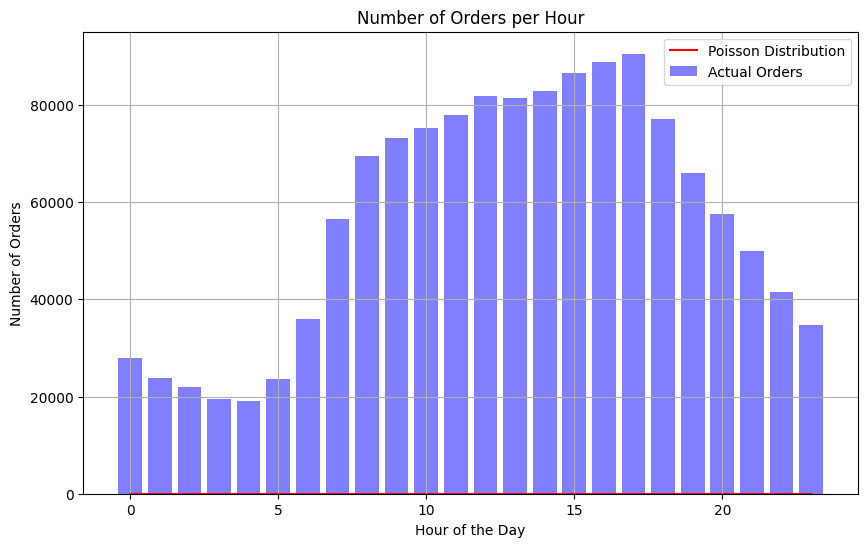

In [73]:
# Plot actual number of orders and Poisson distribution
plt.figure(figsize=(10, 6))
plt.bar(orders_by_hour.index, orders_by_hour.values, color='blue', alpha=0.5, label='Actual Orders')
plt.plot(hours, poisson_probs * len(df), color='red', label='Poisson Distribution')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders per Hour')
plt.legend()
plt.grid(True)
plt.show()